In [1]:
import sklearn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Support Vector Machines

#### Linear SVM

In [4]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, width
y = (iris["target"] == 2) # Iris-virginica

svm_cfl = Pipeline([ 
    ("scale", StandardScaler()), # important to scale features for SVM
    ("linear_svc", LinearSVC(C=1, loss="hinge")) # C sets how much soft margin to allow
])

svm_cfl.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

#### Nonlinear SVM

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X_moon, y_moon = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm_clf = Pipeline([ 
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svwm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=1500))
])

poly_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svwm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=1500,
                           random_state=42))])

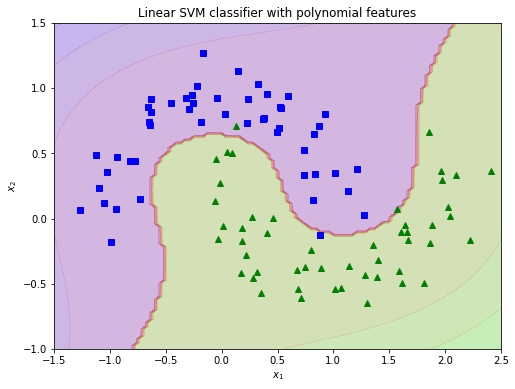

In [39]:
def plot_moon_data(X_moon, y_moon, ax=None):
    if not ax:
        plt.figure(figsize=(8,6))
        plt.plot(X_moon[:,0][y_moon == 0], X_moon[:,1][y_moon == 0], "bs")
        plt.plot(X_moon[:,0][y_moon == 1], X_moon[:,1][y_moon == 1], "g^")
        plt.xlabel(r"$x_1$")
        plt.ylabel(r"$x_2$")
    else:
        ax.plot(X_moon[:,0][y_moon == 0], X_moon[:,1][y_moon == 0], "bs")
        ax.plot(X_moon[:,0][y_moon == 1], X_moon[:,1][y_moon == 1], "g^")
        ax.set_xlabel(r"$x_1$")
        ax.set_ylabel(r"$x_2$")

def plot_contours(classifier, x1_range, x2_range, ax=None):
    x1s = np.linspace(x1_range[0], x1_range[1], 100)
    x2s = np.linspace(x2_range[0], x2_range[1], 100)

    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    pred = classifier.predict(X).reshape(x1.shape)
    decision = classifier.decision_function(X).reshape(x1.shape)

    if not ax:
        plt.contourf(x1, x2, pred, cmap=plt.cm.brg, alpha=0.2)
        plt.contourf(x1, x2, decision, cmap=plt.cm.brg, alpha=0.1)
    else:
        ax.contourf(x1, x2, pred, cmap=plt.cm.brg, alpha=0.2)
        ax.contourf(x1, x2, decision, cmap=plt.cm.brg, alpha=0.1)

# plot the data and the 3rd degree SVM classifier
plot_moon_data(X_moon, y_moon)
plot_contours(poly_svm_clf, [-1.5, 2.5], [-1, 1.5])
plt.title("Linear SVM classifier with polynomial features")
plt.show()

### Polynomial Kernel

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # trains faster
])

poly_kernel_svm_clf_10 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) # trains faster
])

poly_kernel_svm_clf.fit(X_moon, y_moon)
poly_kernel_svm_clf_10.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

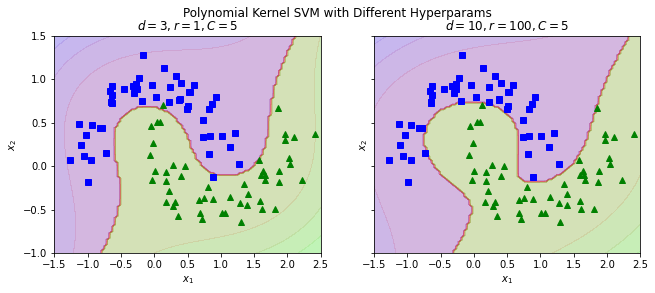

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

fig.suptitle("Polynomial Kernel SVM with Different Hyperparams")
plot_moon_data(X_moon, y_moon, ax=ax[0])
plot_contours(poly_kernel_svm_clf, [-1.5, 2.5], [-1, 1.5], ax[0])
ax[0].set_title(r"$d=3, r=1, C=5$", fontsize=12)


plot_moon_data(X_moon, y_moon, ax[1])
plot_contours(poly_kernel_svm_clf_10, [-1.5, 2.5], [-1, 1.5], ax=ax[1])
ax[1].set_title(r"$d=10, r=100, C=5$", fontsize=12)
plt.show()